In [1]:
# Setup: imports & DB path
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "inventory.db"
TABLE = "inventory"

pd.set_option("display.max_rows", 10)



In [5]:
# Query: total inventory by day
sql = f"""
SELECT date("Date") AS d, SUM("Inventory Level") AS total_inventory
FROM {TABLE}
GROUP BY date("Date")
ORDER BY d ASC
"""

with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query(sql, conn)

df.head()


,d,total_inventory
0,2022-01-01,28424
1,2022-01-02,27250
2,2022-01-03,27269
3,2022-01-04,27588
4,2022-01-05,28680


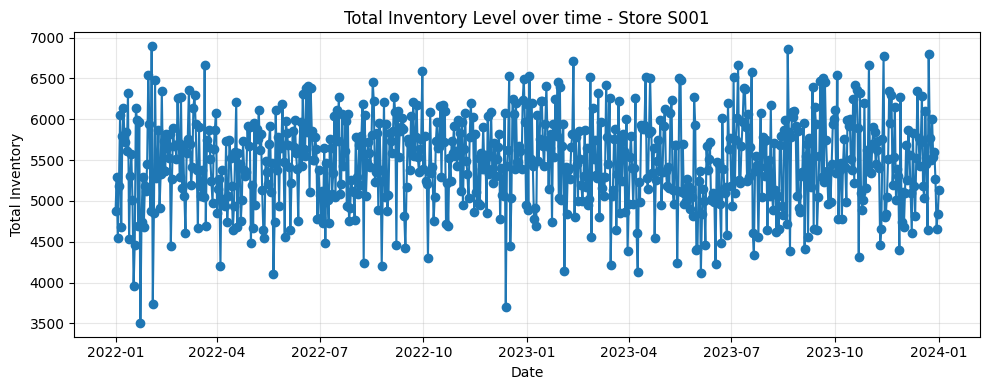

In [9]:
sql = """
SELECT date("Date") AS d, SUM("Inventory Level") AS total_inventory
FROM inventory
WHERE "Store ID" = 'S001'
GROUP BY date("Date")
ORDER BY d ASC

"""
import sqlite3, pandas as pd, matplotlib.pyplot as plt
with sqlite3.connect("inventory.db") as conn:
    df = pd.read_sql_query(sql, conn)

plt.figure(figsize=(10,4))
plt.plot(pd.to_datetime(df["d"]), df["total_inventory"], marker="o")
plt.title("Total Inventory Level over time - Store S001")
plt.xlabel("Date"); plt.ylabel("Total Inventory"); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

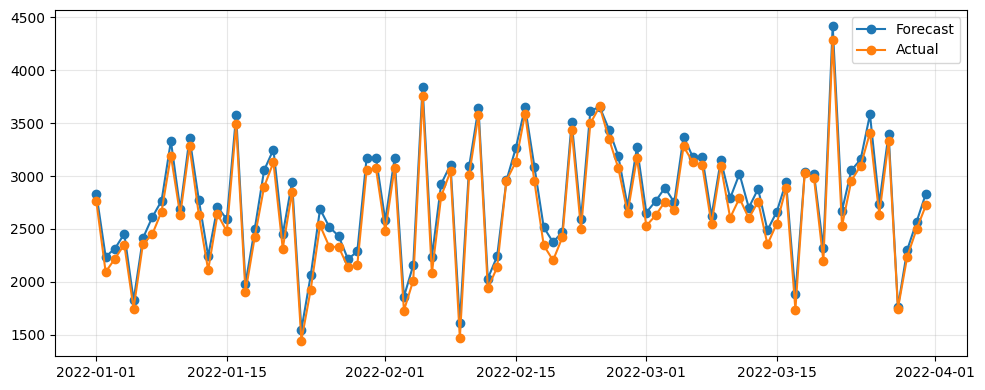

In [16]:
sql = """
SELECT date("Date") AS d,
       SUM("Demand Forecast") AS forecast,
       SUM("Units Sold")      AS sold
FROM inventory
WHERE "Store ID" = 'S001'
  AND date("Date") BETWEEN date('2022-01-01') AND date('2022-03-31')
GROUP BY date("Date")
ORDER BY d ASC;
"""
with sqlite3.connect("inventory.db") as conn:
    df = pd.read_sql_query( sql, conn)
df["d"] = pd.to_datetime(df["d"])
plt.figure(figsize=(10,4))
plt.plot(df["d"], df["forecast"], label="Forecast", marker="o")
plt.plot(df["d"], df["sold"],     label="Actual",   marker="o")
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Kết nối DB (ở đây giả sử có file SQLite)
conn = sqlite3.connect("D:\SQL_AGENT\data\inventory.db")


<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4044\2206512307.py:6: SyntaxWarning: invalid escape sequence '\S'
  conn = sqlite3.connect("D:\SQL_AGENT\data\inventory.db")


In [6]:

YEAR = 2022
PRODUCT_ID = "P0001"   # đổi theo sản phẩm bạn muốn


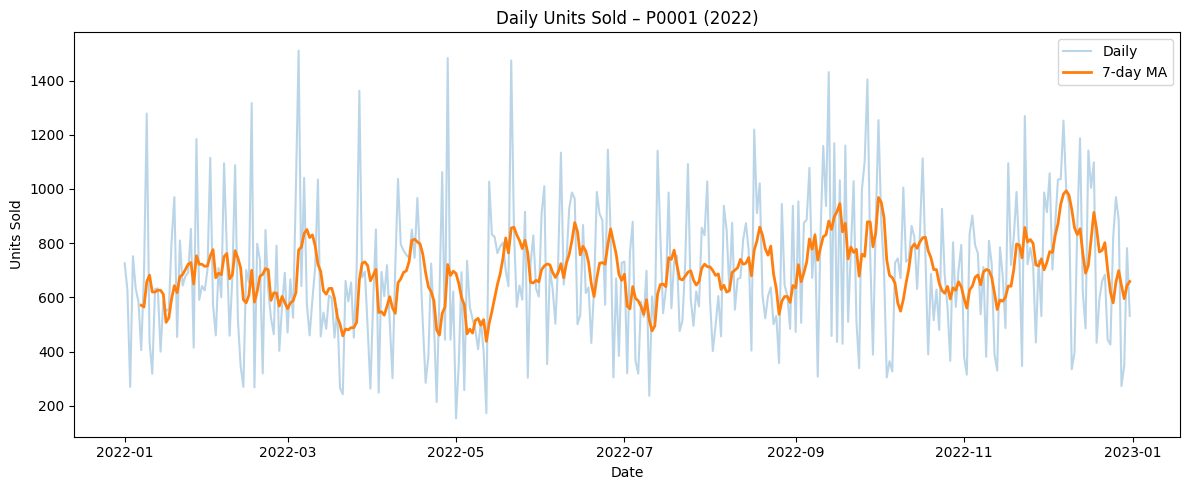

In [7]:
q_daily_product = f"""
SELECT
  Date,
  [Product ID] AS product_id,
  SUM([Units Sold]) AS units_sold
FROM inventory
WHERE strftime('%Y', Date) = '{YEAR}' AND [Product ID] = '{PRODUCT_ID}'
GROUP BY Date, [Product ID]
ORDER BY Date;
"""

dfp = pd.read_sql_query(q_daily_product, conn)
dfp["Date"] = pd.to_datetime(dfp["Date"])
dfp = dfp.sort_values("Date")
dfp["ma7"] = dfp["units_sold"].rolling(7).mean()

plt.figure(figsize=(12,5))
plt.plot(dfp["Date"], dfp["units_sold"], alpha=0.3, label="Daily")
plt.plot(dfp["Date"], dfp["ma7"], linewidth=2, label="7-day MA")
plt.title(f"Daily Units Sold – {PRODUCT_ID} ({YEAR})")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()


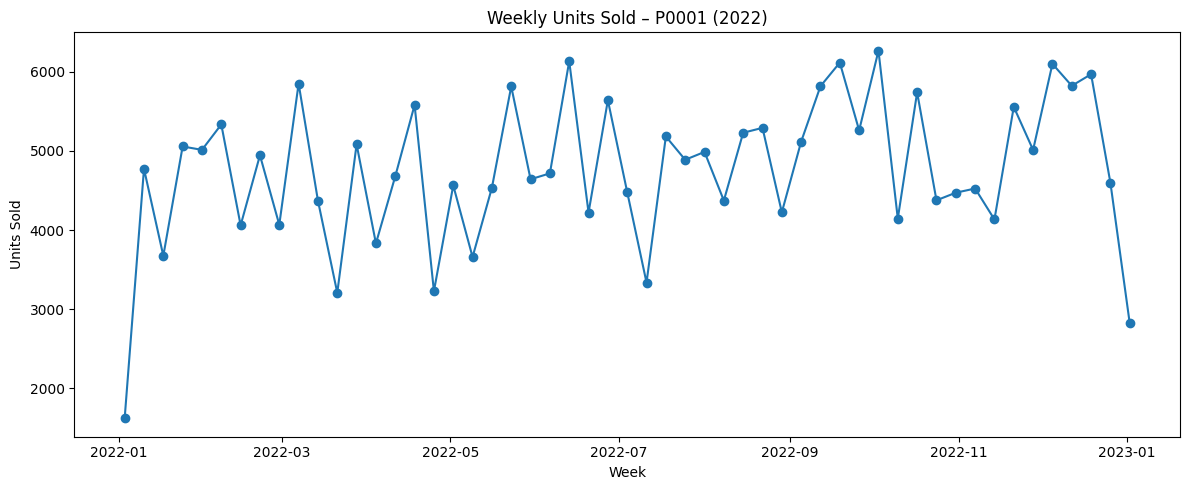

In [8]:
dfp_w = dfp.resample("W-MON", on="Date")["units_sold"].sum().reset_index()
plt.figure(figsize=(12,5))
plt.plot(dfp_w["Date"], dfp_w["units_sold"], marker="o")
plt.title(f"Weekly Units Sold – {PRODUCT_ID} ({YEAR})")
plt.xlabel("Week")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


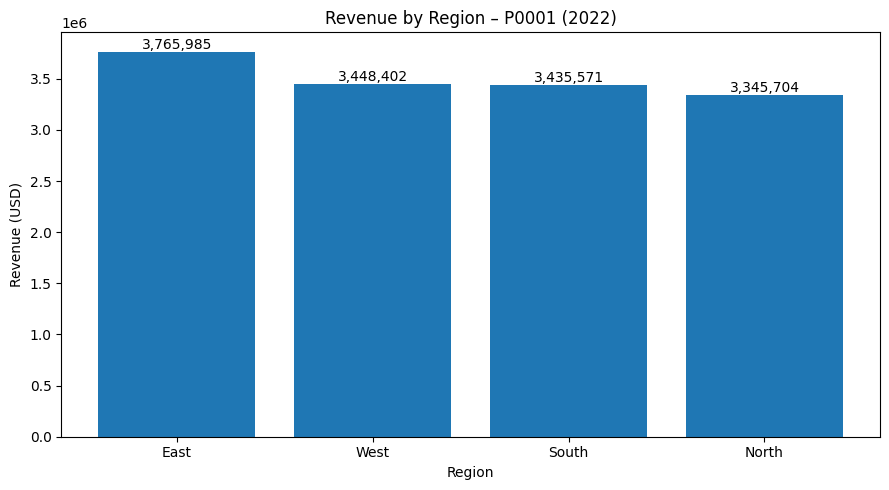

In [9]:
q_rev_region_product = f"""
SELECT
  Region,
  SUM([Units Sold] * Price) AS revenue
FROM inventory
WHERE strftime('%Y', Date) = '{YEAR}' AND [Product ID] = '{PRODUCT_ID}'
GROUP BY Region
ORDER BY revenue DESC;
"""

df_rev = pd.read_sql_query(q_rev_region_product, conn)

plt.figure(figsize=(9,5))
plt.bar(df_rev["Region"], df_rev["revenue"])
plt.title(f"Revenue by Region – {PRODUCT_ID} ({YEAR})")
plt.xlabel("Region")
plt.ylabel("Revenue (USD)")
for i, v in enumerate(df_rev["revenue"]):
    plt.text(i, v, f"{v:,.0f}", ha="center", va="bottom", rotation=0)
plt.tight_layout()
plt.show()
